In [1]:
import numpy as np
import pandas as pd
import urllib.request
import io
from io import StringIO
import requests
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess
from pprint import pprint

In [2]:
#  https://worldpopulationreview.com/states/state-abbreviations
d_path = 'csvDataStateAbreviations.csv'
dfAB= pd.read_csv(d_path)
dfAB

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [3]:
# https://worldpopulationreview.com/states
d_path = 'csvData.csv'
dfp= pd.read_csv(d_path)
dfp

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39613500,0.0038,39461600,37319500,0.0615,0.1184,254.2929
1,2,Texas,29730300,0.0385,28628700,25242000,0.1778,0.0889,113.8080
2,3,Florida,21944600,0.0330,21244300,18845500,0.1644,0.0656,409.2233
3,4,New York,19300000,-0.0118,19530400,19399900,-0.0051,0.0577,409.5404
4,5,Pennsylvania,12804100,0.0002,12800900,12711200,0.0073,0.0383,286.1699
5,6,Illinois,12569300,-0.0121,12723100,12840500,-0.0211,0.0376,226.3964
6,7,Ohio,11714600,0.0033,11676300,11539300,0.0152,0.0350,286.6939
7,8,Georgia,10830000,0.0303,10511100,9711880,0.1151,0.0324,188.3053
8,9,North Carolina,10701000,0.0308,10381600,9574320,0.1177,0.0320,220.1037
9,10,Michigan,9992430,0.0008,9984070,9877510,0.0116,0.0299,176.7352


In [4]:
dfm = pd.merge(dfAB, dfp, on=['State'], how='inner')
dfm.head(55)

,State,Abbrev,Code,rank,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,Alabama,Ala.,AL,24,4934190,0.0095,4887680,4785440,0.0311,0.0147,97.4270
1,Alaska,Alaska,AK,49,724357,-0.0147,735139,713910,0.0146,0.0022,1.2694
2,Arizona,Ariz.,AZ,14,7520100,0.0506,7158020,6407170,0.1737,0.0225,66.2016
3,Arkansas,Ark.,AR,34,3033950,0.0080,3009730,2921960,0.0383,0.0091,58.3059
4,California,Calif.,CA,1,39613500,0.0038,39461600,37319500,0.0615,0.1184,254.2929
5,Colorado,Colo.,CO,20,5893630,0.0356,5691290,5047350,0.1677,0.0176,56.8653
6,Connecticut,Conn.,CT,29,3552820,-0.0052,3571520,3579110,-0.0073,0.0106,733.7505
7,Delaware,Del.,DE,46,990334,0.0257,965479,899593,0.1009,0.0030,508.1242
8,District of Columbia,D.C.,DC,50,714153,0.0180,701547,605226,0.1800,0.0021,11707.4262
9,Florida,Fla.,FL,3,21944600,0.0330,21244300,18845500,0.1644,0.0656,409.2233


In [5]:
statesPOP = dfm.groupby('Code')['Pop'].apply(list).to_dict()
print(statesPOP)

{'AK': [724357], 'AL': [4934190], 'AR': [3033950], 'AZ': [7520100], 'CA': [39613500], 'CO': [5893630], 'CT': [3552820], 'DC': [714153], 'DE': [990334], 'FL': [21944600], 'GA': [10830000], 'HI': [1406430], 'IA': [3167970], 'ID': [1860120], 'IL': [12569300], 'IN': [6805660], 'KS': [2917220], 'KY': [4480710], 'LA': [4627000], 'MA': [6912240], 'MD': [6065440], 'ME': [1354520], 'MI': [9992430], 'MN': [5706400], 'MO': [6169040], 'MS': [2966410], 'MT': [1085000], 'NC': [10701000], 'ND': [770026], 'NE': [1952000], 'NH': [1372200], 'NJ': [8874520], 'NM': [2105000], 'NV': [3185790], 'NY': [19300000], 'OH': [11714600], 'OK': [3990440], 'OR': [4289440], 'PA': [12804100], 'RI': [1061510], 'SC': [5277830], 'SD': [896581], 'TN': [6944260], 'TX': [29730300], 'UT': [3310770], 'VA': [8603980], 'VT': [623251], 'WA': [7796940], 'WI': [5852490], 'WV': [1767860], 'WY': [581075]}


In [6]:
AllStates = statesPOP.keys()
print(AllStates)

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


In [7]:
NoMandStates = ["SD", "OK", "ID", "AK", "GA", "MO", "NE", "SC", "TN", "FL"]
RescindMandStates = ["ND", "MT", "TX", "WY", "IA", "MS", "KS"]

In [8]:
MandStates = list(set(AllStates)-set(NoMandStates))
print(MandStates)

['MI', 'LA', 'CO', 'WA', 'MN', 'NJ', 'VT', 'AZ', 'CA', 'NV', 'IA', 'WV', 'ND', 'NM', 'MS', 'CT', 'HI', 'IL', 'MD', 'DE', 'KS', 'NY', 'MA', 'WI', 'AL', 'UT', 'RI', 'KY', 'OH', 'DC', 'VA', 'OR', 'MT', 'IN', 'WY', 'ME', 'PA', 'NC', 'NH', 'TX', 'AR']


In [9]:
MandStateDates = {"AL":[date(2020,7,16)], "AR":[date(2020,7,16)], "AZ":[date(2020,6,17)],"CA":[date(2020,6,18)], 
                  "CO":[date(2020,7,17)], "CT":[date(2020,4,17)], "DE":[date(2020,4,1)], "DC":[date(2020,7,22)],
                  "HI":[date(2020,4,25)], "IL":[date(2020,5,1)], "IN":[date(2020,7,27)], "IA":[date(2020,11,17)], 
                  "KS":[date(2020,7,3)], "KY":[date(2020,7,9)], "LA":[date(2020,7,11)], "ME":[date(2020,5,1)], 
                  "MD":[date(2020,7,31)], "MA":[date(2020,5,5)], "MI":[date(2020,10,5)], "MN":[date(2020,7,25)], 
                  "MT":[date(2020,7,15)], "NV":[date(2020,6,24)], "NH":[date(2020,8,12)], "NJ":[date(2020,7,8)], 
                  "NM":[date(2020,5,16)], "NY":[date(2020,4,17)], "NC":[date(2020,6,24)], "ND":[date(2020,11,14)], 
                  "OH":[date(2020,7,23)], "OR":[date(2020,7,1)], "PA":[date(2020,7,1)], "RI":[date(2020,5,8)],
                  "TX":[date(2020,7,3)], "UT":[date(2020,9,22)], "VT":[date(2020,8,1)], "VA":[date(2020,5,28)], 
                  "WA":[date(2020,6,26)], "WV":[date(2020,7,7)], "WI":[date(2020,8,1)], "WY":[date(2020,12,9)], 
                  "MS":[date(2020,7,30)]}

RescindMandStateDates = {"ND":[date(2021,1,18)], "MT":[date(2021,2,12)], "TX":[date(2021,3,10)], "WY":[date(2021,3,16)],
                         "IA":[date(2021,2,7)], "MS":[date(2021,3,3)], "KS":[date(2021,4,1)]}

In [10]:
dfStatesPop = pd.DataFrame(statesPOP)
dfStatesPop

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,724357,4934190,3033950,7520100,39613500,5893630,3552820,714153,990334,21944600,...,896581,6944260,29730300,3310770,8603980,623251,7796940,5852490,1767860,581075


In [11]:
print("USA population", dfStatesPop.values.sum())

USA population 331343487


In [12]:
NoMandStates_pop = {key: statesPOP[key] for key in NoMandStates}
print(NoMandStates_pop)

{'SD': [896581], 'OK': [3990440], 'ID': [1860120], 'AK': [724357], 'GA': [10830000], 'MO': [6169040], 'NE': [1952000], 'SC': [5277830], 'TN': [6944260], 'FL': [21944600]}


In [13]:
MandStates_pop = {key: statesPOP[key] for key in MandStates}
print(MandStates_pop)

{'MI': [9992430], 'LA': [4627000], 'CO': [5893630], 'WA': [7796940], 'MN': [5706400], 'NJ': [8874520], 'VT': [623251], 'AZ': [7520100], 'CA': [39613500], 'NV': [3185790], 'IA': [3167970], 'WV': [1767860], 'ND': [770026], 'NM': [2105000], 'MS': [2966410], 'CT': [3552820], 'HI': [1406430], 'IL': [12569300], 'MD': [6065440], 'DE': [990334], 'KS': [2917220], 'NY': [19300000], 'MA': [6912240], 'WI': [5852490], 'AL': [4934190], 'UT': [3310770], 'RI': [1061510], 'KY': [4480710], 'OH': [11714600], 'DC': [714153], 'VA': [8603980], 'OR': [4289440], 'MT': [1085000], 'IN': [6805660], 'WY': [581075], 'ME': [1354520], 'PA': [12804100], 'NC': [10701000], 'NH': [1372200], 'TX': [29730300], 'AR': [3033950]}


In [14]:
RescindMandStates_pop = {key: statesPOP[key] for key in RescindMandStates}
pprint(RescindMandStates_pop)

{'IA': [3167970],
 'KS': [2917220],
 'MS': [2966410],
 'MT': [1085000],
 'ND': [770026],
 'TX': [29730300],
 'WY': [581075]}


# Data From USA facts

In [15]:
# first get deaths
url="https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv"
s=requests.get(url).content

In [16]:
dfDeaths = pd.read_csv(io.StringIO(s.decode('utf-8')))
dfDeaths.set_index(["State"],inplace=True)

In [17]:
dfUSA_D = dfDeaths.copy()

In [18]:
dfUSA_D.head()

,countyFIPS,County Name,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,...,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01
State,,,,,,,,,,,,,,,,,,,,,
AL,0,Statewide Unallocated,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,1001,Autauga County,1,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
AL,1003,Baldwin County,1,0,0,0,0,0,0,0,...,297,300,300,301,301,301,301,301,301,301
AL,1005,Barbour County,1,0,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,55,55
AL,1007,Bibb County,1,0,0,0,0,0,0,0,...,60,60,60,60,60,60,60,60,60,60


In [19]:
dfUS_D = dfUSA_D.drop(["StateFIPS", "countyFIPS", "County Name"], axis = 1) 
dfUS_D.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01
State,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
AL,0,0,0,0,0,0,0,0,0,0,...,297,300,300,301,301,301,301,301,301,301
AL,0,0,0,0,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,55,55
AL,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,60,60,60,60,60


In [20]:
dfD = dfUS_D.groupby(['State']).sum().T

In [21]:
dfD.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dfD.tail()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2021-03-28,298,10530,5646,16918,57778,6104,7869,1056,1552,33213,...,1933,11821,47136,2120,10287,225,5221,6635,2639,696
2021-03-29,298,10530,5649,16921,57778,6104,7886,1059,1552,33270,...,1933,11871,47149,2120,10302,225,5227,6638,2644,696
2021-03-30,298,10532,5661,16942,57778,6107,7889,1061,1559,33366,...,1935,11900,47258,2123,10319,225,5238,6646,2647,696
2021-03-31,298,10558,5669,16968,57778,6116,7893,1064,1559,33450,...,1935,11910,47258,2127,10327,227,5250,6653,2680,701
2021-04-01,298,10558,5678,16979,58094,6126,7902,1066,1559,33519,...,1938,11924,47501,2389,10338,227,5264,6660,2688,701


In [23]:
dfD = dfD.diff(axis=0);
dfD.dropna(inplace=True)
dfD[dfD < 0] = 0  # assume negative numbers are anomolies..

In [24]:
dfD.index = pd.to_datetime(dfD.index)

In [25]:
dftest = dfD[NoMandStates]
dftest.tail(10)

State,SD,OK,ID,AK,GA,MO,NE,SC,TN,FL
2021-03-23,0.0,62.0,5.0,2.0,16.0,53.0,2.0,3.0,30.0,48.0
2021-03-24,1.0,0.0,1.0,0.0,68.0,13.0,26.0,27.0,43.0,34.0
2021-03-25,3.0,0.0,2.0,1.0,78.0,0.0,9.0,26.0,5.0,101.0
2021-03-26,1.0,0.0,0.0,0.0,80.0,3.0,1.0,12.0,19.0,157.0
2021-03-27,5.0,0.0,0.0,0.0,68.0,1.0,0.0,11.0,0.0,42.0
2021-03-28,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0,0.0,38.0
2021-03-29,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,50.0,57.0
2021-03-30,2.0,0.0,0.0,0.0,13.0,53.0,2.0,4.0,29.0,96.0
2021-03-31,0.0,103.0,6.0,0.0,71.0,0.0,3.0,20.0,10.0,84.0
2021-04-01,3.0,0.0,1.0,0.0,257.0,2.0,14.0,27.0,14.0,69.0


In [26]:
print("Total Number of Deaths in The USA from Covid-19:")
TotDeath = dfD.to_numpy().sum()
print(TotDeath)

Total Number of Deaths in The USA from Covid-19:
546376.0


In [27]:
# now get confirmed positive caes
url="https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv"
s=requests.get(url).content
dfPos = pd.read_csv(io.StringIO(s.decode('utf-8')))
dfPos.set_index(["State"],inplace=True)
# save to csv in case website is down
dfPos.to_csv('dfPos.csv', header=False, index=False)

In [28]:
dfUSA_P = dfPos.copy()
dfUSA_P.head()

,countyFIPS,County Name,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,...,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01
State,,,,,,,,,,,,,,,,,,,,,
AL,0,Statewide Unallocated,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,1001,Autauga County,1,0,0,0,0,0,0,0,...,6525,6533,6540,6543,6562,6570,6577,6580,6589,6595
AL,1003,Baldwin County,1,0,0,0,0,0,0,0,...,20361,20395,20417,20423,20453,20473,20487,20492,20505,20523
AL,1005,Barbour County,1,0,0,0,0,0,0,0,...,2213,2216,2218,2221,2224,2226,2226,2227,2227,2227
AL,1007,Bibb County,1,0,0,0,0,0,0,0,...,2530,2535,2535,2535,2535,2536,2536,2537,2542,2543


In [29]:
dfUS_P = dfUSA_P.drop(["StateFIPS", "countyFIPS", "County Name"], axis = 1) 
dfUS_P.tail(10)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01
State,,,,,,,,,,,,,,,,,,,,,
WY,0,0,0,0,0,0,0,0,0,0,...,150,150,150,150,150,150,150,150,150,150
WY,0,0,0,0,0,0,0,0,0,0,...,2641,2641,2641,2643,2643,2643,2644,2644,2644,2644
WY,0,0,0,0,0,0,0,0,0,0,...,606,606,607,607,607,607,608,610,610,610
WY,0,0,0,0,0,0,0,0,0,0,...,3055,3055,3057,3064,3064,3064,3074,3078,3079,3080
WY,0,0,0,0,0,0,0,0,0,0,...,689,692,692,693,693,693,700,703,705,707
WY,0,0,0,0,0,0,0,0,0,0,...,3951,3953,3961,3990,3990,3990,4002,4006,4022,4030
WY,0,0,0,0,0,0,0,0,0,0,...,3532,3547,3549,3562,3562,3562,3593,3593,3609,3618
WY,0,0,0,0,0,0,0,0,0,0,...,2111,2113,2115,2119,2119,2119,2123,2125,2128,2134
WY,0,0,0,0,0,0,0,0,0,0,...,889,890,890,890,890,890,891,891,891,891


In [30]:
# dfUS_P = dfUSA_P.drop(["StateFIPS", "countyFIPS", "County Name"], axis = 1) 
dfP = dfUS_P.groupby(['State']).sum().T
dfP.tail()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2021-03-28,59627,514415,329934,840492,3564476,458559,305210,44175,94402,2044006,...,117336,806796,2774948,384562,615723,18820,361115,634138,140613,56047
2021-03-29,59627,514642,330013,840614,3564476,459365,308439,44248,94402,2047383,...,117352,809692,2777109,384756,616865,19003,362400,634462,140991,56190
2021-03-30,60248,515015,330188,841192,3564476,460323,310056,44413,94573,2052550,...,117495,810532,2780781,385127,618309,19109,363243,635321,141327,56240
2021-03-31,60248,515423,330401,841884,3564476,462085,310888,44513,94802,2057825,...,117761,811845,2780903,385641,619366,19275,364489,636046,141739,56316
2021-04-01,60628,515893,330611,842273,3570718,463690,312468,44656,95188,2064712,...,117991,813615,2788327,412864,621213,19523,365765,636912,142233,56395


In [31]:
dfP = dfP.diff(axis=0);
dfP.dropna(inplace=True)
dfP[dfP < 0] = 0  # assume negative numbers are anomolies..

In [32]:
dfP.index = pd.to_datetime(dfP.index)
dfP.tail()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2021-03-28,0.0,317.0,69.0,600.0,0.0,959.0,0.0,124.0,340.0,4942.0,...,0.0,0.0,3839.0,0.0,1382.0,196.0,0.0,471.0,0.0,0.0
2021-03-29,0.0,227.0,79.0,122.0,0.0,806.0,3229.0,73.0,0.0,3377.0,...,16.0,2896.0,2161.0,194.0,1142.0,183.0,1285.0,324.0,378.0,143.0
2021-03-30,621.0,373.0,175.0,578.0,0.0,958.0,1617.0,165.0,171.0,5167.0,...,143.0,840.0,3672.0,371.0,1444.0,106.0,843.0,859.0,336.0,50.0
2021-03-31,0.0,408.0,213.0,692.0,0.0,1762.0,832.0,100.0,229.0,5275.0,...,266.0,1313.0,122.0,514.0,1057.0,166.0,1246.0,725.0,412.0,76.0
2021-04-01,380.0,470.0,210.0,389.0,6242.0,1605.0,1580.0,143.0,386.0,6887.0,...,230.0,1770.0,7424.0,27223.0,1847.0,248.0,1276.0,866.0,494.0,79.0


In [33]:
print("Total Number of Covid-19 Positive Cases in The USA:")
TotPos = dfP.to_numpy().sum()
print(TotPos)

Total Number of Covid-19 Positive Cases in The USA:
30108399.0


In [34]:
DeathRate = (TotDeath/TotPos)*100
print("The Death Rate (in percentage) for the USA is:", round(DeathRate, 3))

The Death Rate (in percentage) for the USA is: 1.815


In [35]:
def plot_var_perCap(var='positiveIncrease',
             state='TX'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
    
    s = dfStatesPop.at[0,state]
    print("state population =", s)
 
    if var == 'deathIncrease':
        y = dfD[state]*100000/s
        x = dfD[state].index
    else:
        y = dfP[state]*100000/s
        x = dfP[state].index
    
    Dy = pd.DataFrame(y)
    Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
#     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()

    #convert Dy dataframe to series
    Dfy = Dy.squeeze()

    df_loess = pd.DataFrame(lowess(Dfy, np.arange(len(Dfy)), frac=0.05)[:, 1], index=x, columns=[var])
    mx = 1.5 * df_loess.max()
    
    print('mx =', mx)
    plt.figure(figsize=(16,9))
    plt.title("Plot of \"{}\" for {} per Capita (per 100K)".format(var,state),fontsize=18)
    if state in MandStateDates:
        MaskDate = MandStateDates.get(state)
        plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate")  
        
    if state in RescindMandStateDates:
        UnMaskDate = RescindMandStateDates.get(state)
        plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                   label="End mandate")         
        
#     plt.bar(x=x,height=y,edgecolor='pink',color='beige')
    plt.plot(x,Dy, color='orange', label="rolling average")
    plt.plot(x, df_loess, color='blue', label="loess curve fit")
    plt.legend()
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)  
    plt.show()

In [36]:
def plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=['TX', 'FL', 'CA']):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    
    index = 0
    colorList = ['black','red','green','blue','orange','brown','grey','cyan','tan', 'magenta']
    
    plt.figure(figsize=(16,9))
    plt.title("Plot of \"{}\" per Capita (per 100K)".format(var),fontsize=18)    
    for state in statesList:
        index = index + 1
        s = dfStatesPop.at[0,state]
        print('s=', s)
        
        if var == 'deathIncrease':
            y = dfD[state]*100000/s
            x = dfD[state].index
        else:
            y = dfP[state]*100000/s
            x = dfP[state].index
            
        Dy = pd.DataFrame(y)
        Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
    #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
        #convert Dy dataframe to series
        Dfy = Dy.squeeze()

        df_loess = pd.DataFrame(lowess(Dfy, np.arange(len(Dfy)), frac=0.10)[:, 1], index=x, columns=[var])
        mx = df_loess.max()

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            plt.vlines(MaskDate, color=colorList[index-1], ymin=0, ymax=mx, linestyle=(0, (5, 10)), \
                       label="\"{}\" mask mandate".format(state))  
        
        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            plt.vlines(UnMaskDate, color=colorList[index-1], ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="\"{}\" End mandate".format(state))  
            
        plt.plot(x, df_loess, color=colorList[index-1], label=state)        
        
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.show()

In [37]:
def plot_var_perCap_compare(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    
    # subplot index to get the correct number of subplots
    si = int(len(statesPOP)/3)
    
    index = 0
    plt.figure(figsize=(16,55))
    
    for state in dfStatesPop:
        index = index + 1
        s = dfStatesPop.at[0,state]
#         print('s=', s)
        if var == 'deathIncrease':
            y = dfD[state]*100000/s
            x = dfD[state].index
        else:
            y = dfP[state]*100000/s
            x = dfP[state].index
                    
        Dy = pd.DataFrame(y)
        Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
    #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
        #convert Dy dataframe to series
        Dfy = Dy.squeeze()

        df_loess = pd.DataFrame(lowess(Dfy, np.arange(len(Dfy)), frac=0.10)[:, 1], index=x, columns=[var])
        mx = df_loess.max()
#         plt.title("Plot of \"{}\" for {} per Capita (per 10K)".format(var,state))
        plt.subplot(si,3,index)
#         plt.bar(x=x,height=y,edgecolor='tan',color='beige')
#         plt.plot(x,Dy, color='red')

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            plt.vlines(MaskDate, color="red", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 
            
        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="End mandate")           

        plt.plot(x, df_loess, color='blue', label="loess curve fit")
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)
        plt.title("\"{}\" for {} per Capita".format(var,state))

    plt.tight_layout()
    plt.show()

s= 29730300
s= 21944600
s= 7520100
s= 3310770
s= 6169040
s= 5277830
s= 2105000
s= 39613500


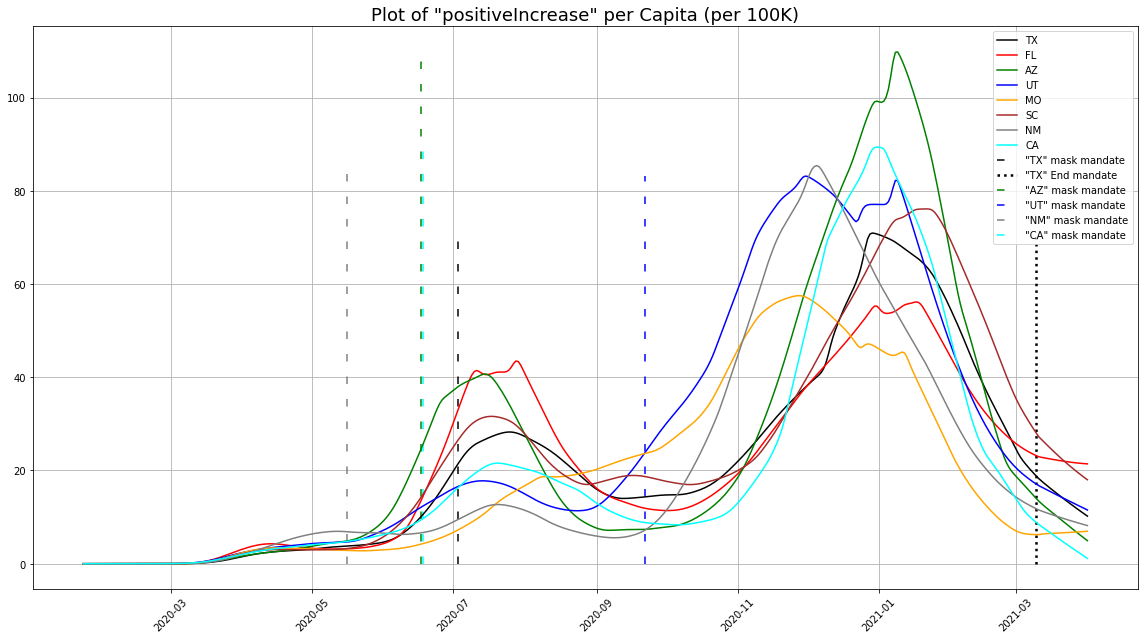

In [38]:
list_of_states_to_compare = ['TX','FL','AZ','UT','MO', 'SC', 'NM', 'CA']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare)

s= 1952000
s= 896581
s= 2105000


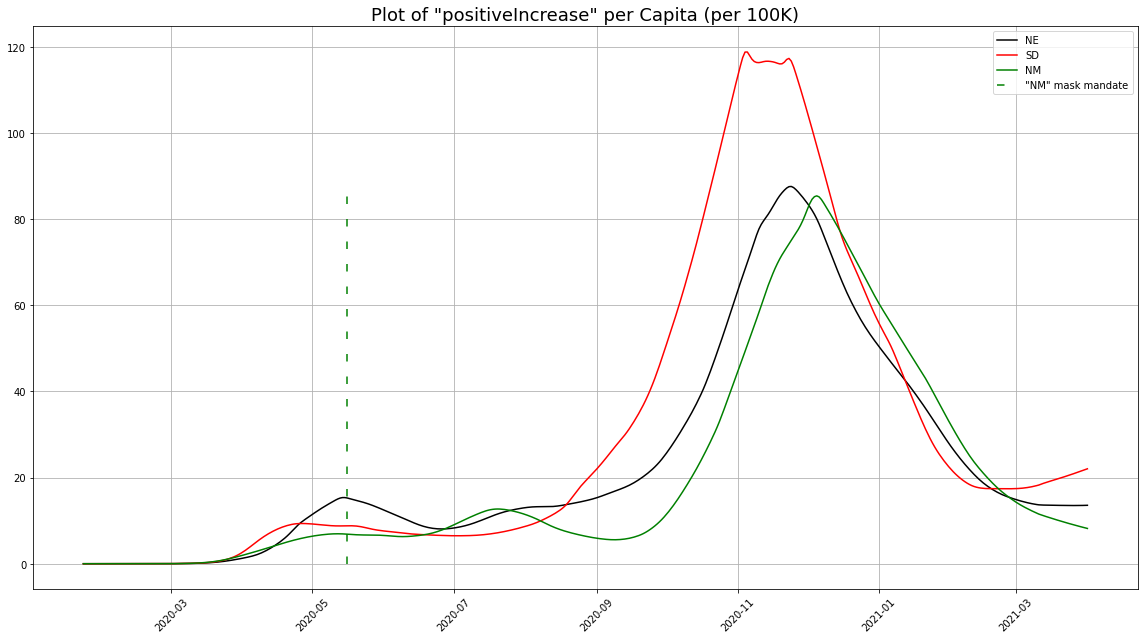

In [39]:
# list_of_states_to_compare = ['TX','FL','GA','AZ','UT','MO', 'SC', 'CA']
list_of_states_to_compare = ['NE','SD','NM']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare)

s= 29730300
s= 21944600
s= 39613500
s= 19300000
s= 8874520


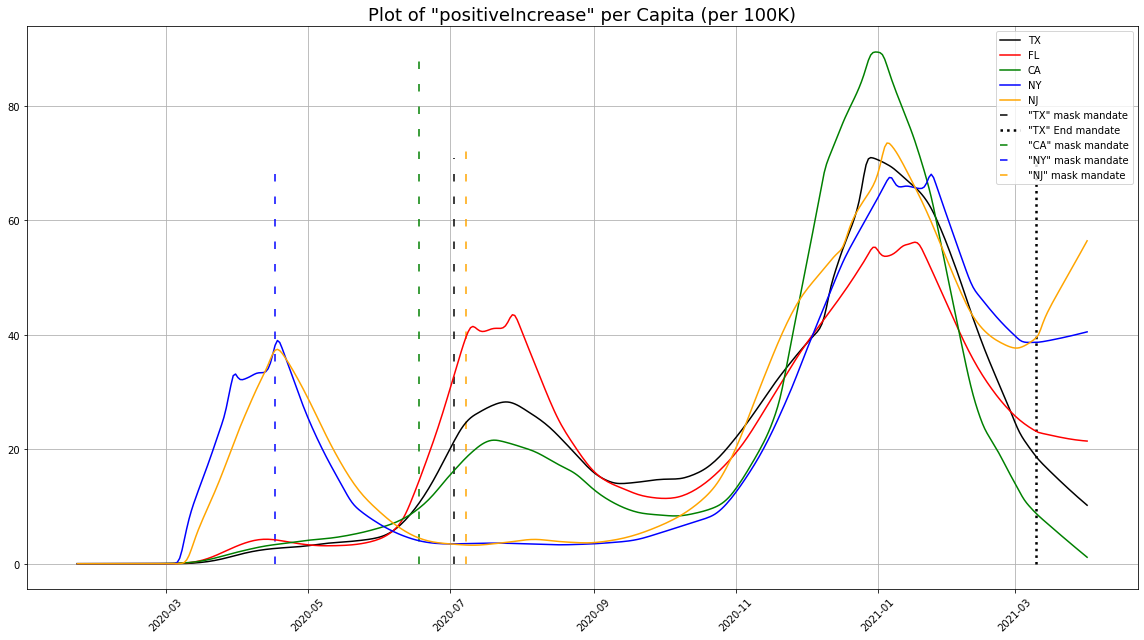

In [40]:
list_of_states_to_compare = ['TX','FL','CA','NY','NJ']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare)

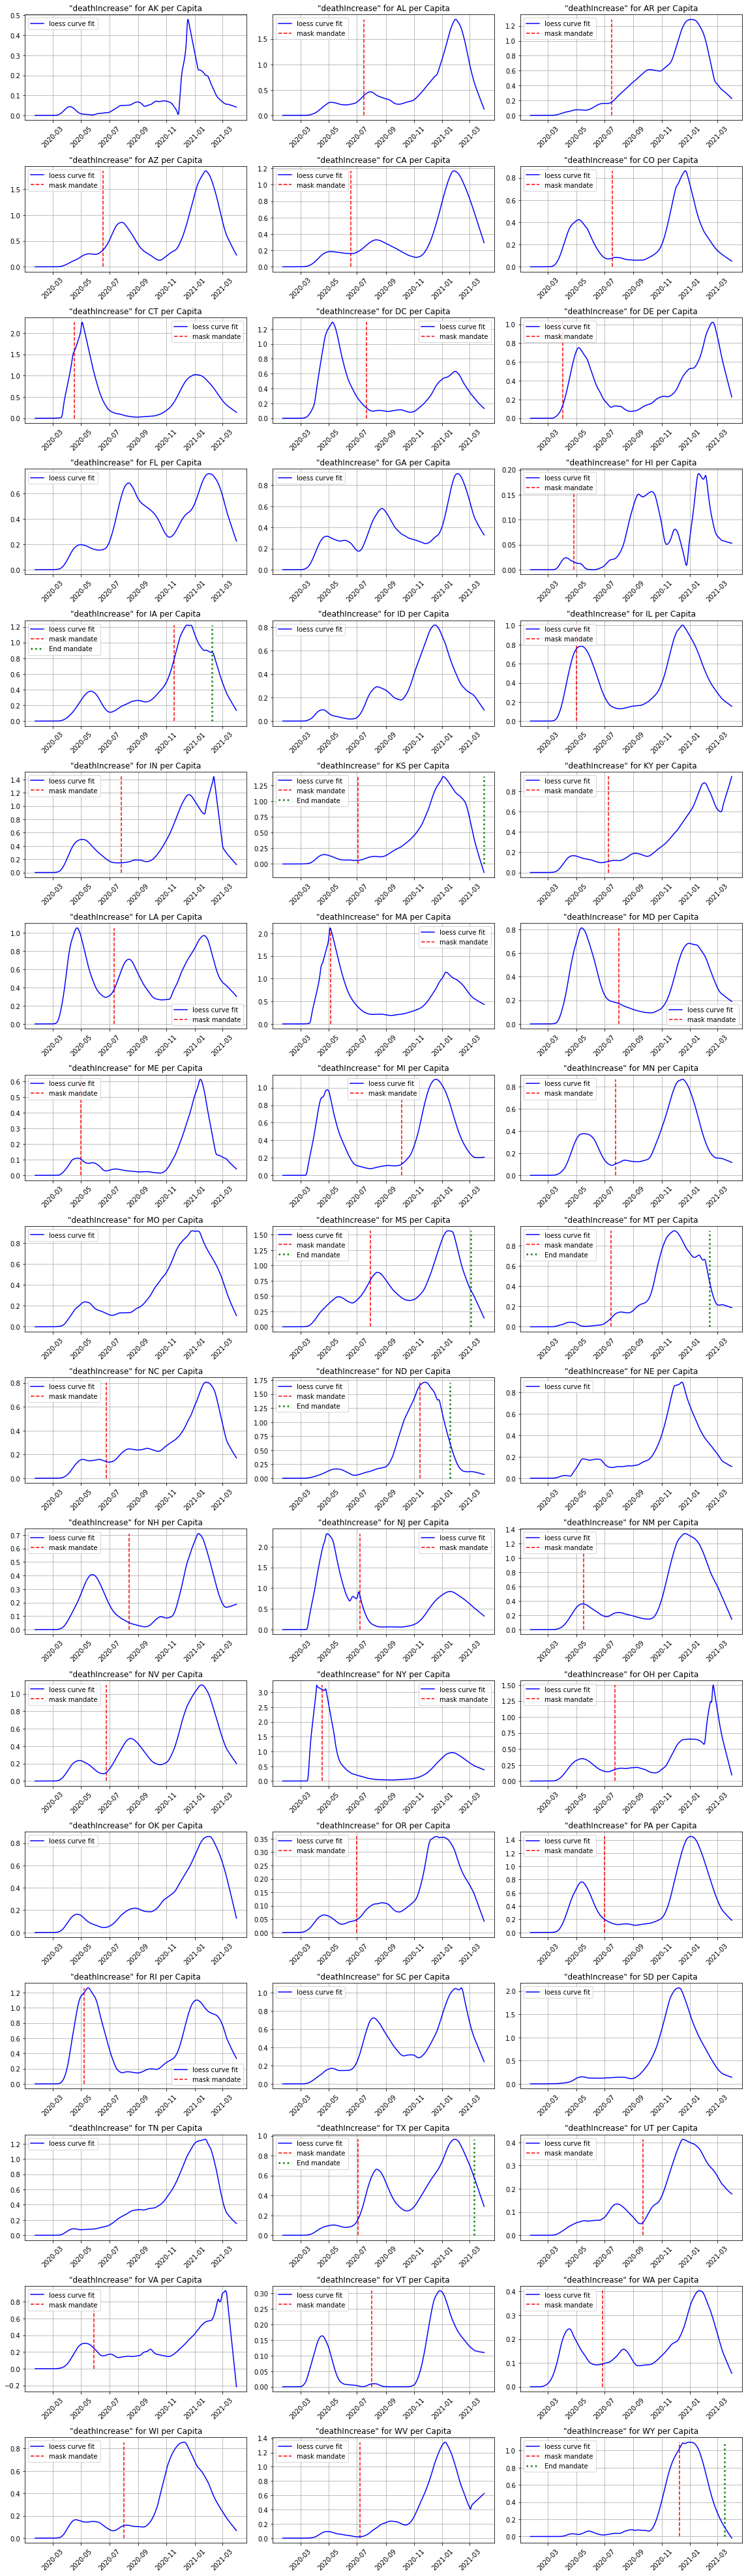

In [41]:
plot_var_perCap_compare("deathIncrease")

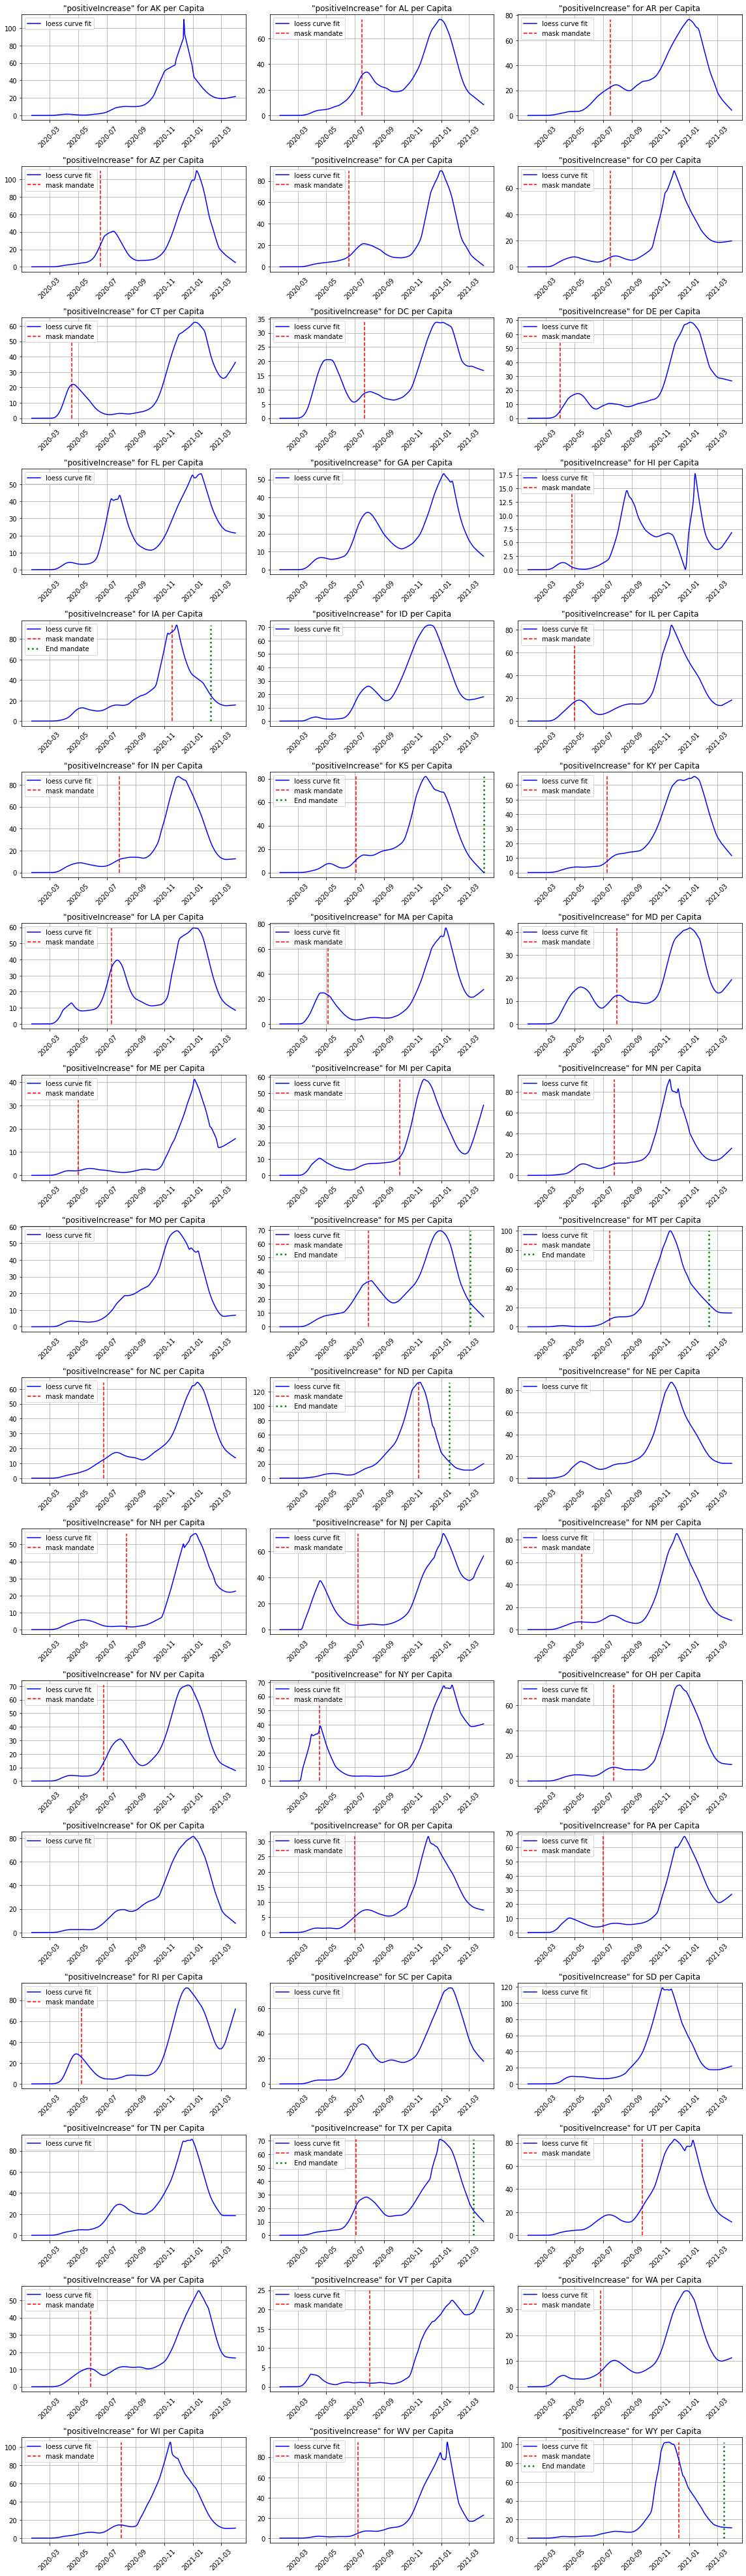

In [42]:
plot_var_perCap_compare("positiveIncrease")

In [43]:
def plot_perCap_compare():
    """
    Plots a bar chart posIncrease and deathIncrease over the date range
    """
    vars = ['posIncrease','deathIncrease']    
    
    # subplot index to get the correct number of subplots
    si = int(len(statesPOP)/3)
            
    index = 0
    plt.figure(figsize=(16,55))
    
    for state in dfStatesPop:
        index = index + 1
        s = dfStatesPop.at[0,state]
#         print('s=', s)
        for var in vars:
            if var == 'deathIncrease':
                y = dfD[state]*100000/s
                x1 = dfD[state].index
            else:
                y = dfP[state]*100000/s
                x2 = dfP[state].index

            Dy = pd.DataFrame(y)
            Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
            #convert Dy dataframe to series
            Dfy = Dy.squeeze()
            
            Dy = pd.DataFrame(y)
            Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
            #convert Dy dataframe to series
            Dfy = Dy.squeeze()            

            if var == 'deathIncrease':
                df1_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x1,columns=[var])
            else:
                df2_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x2,columns=[var]) 
            
            mx = df2_loess.max()
    #         plt.title("Plot of \"{}\" for {} per Capita (per 10K)".format(var,state))
            plt.subplot(si,3,index)
    #         plt.bar(x=x,height=y,edgecolor='tan',color='beige')
    #         plt.plot(x,Dy, color='red')

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 
            
        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="End mandate")           

        plt.plot(x1, df1_loess, color='red', label="death increase")
        plt.plot(x2, df2_loess, color='blue', label="positive increase")
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)
        plt.title("positives vs. death for {} per 100K".format(state))

    plt.tight_layout()
    plt.show()

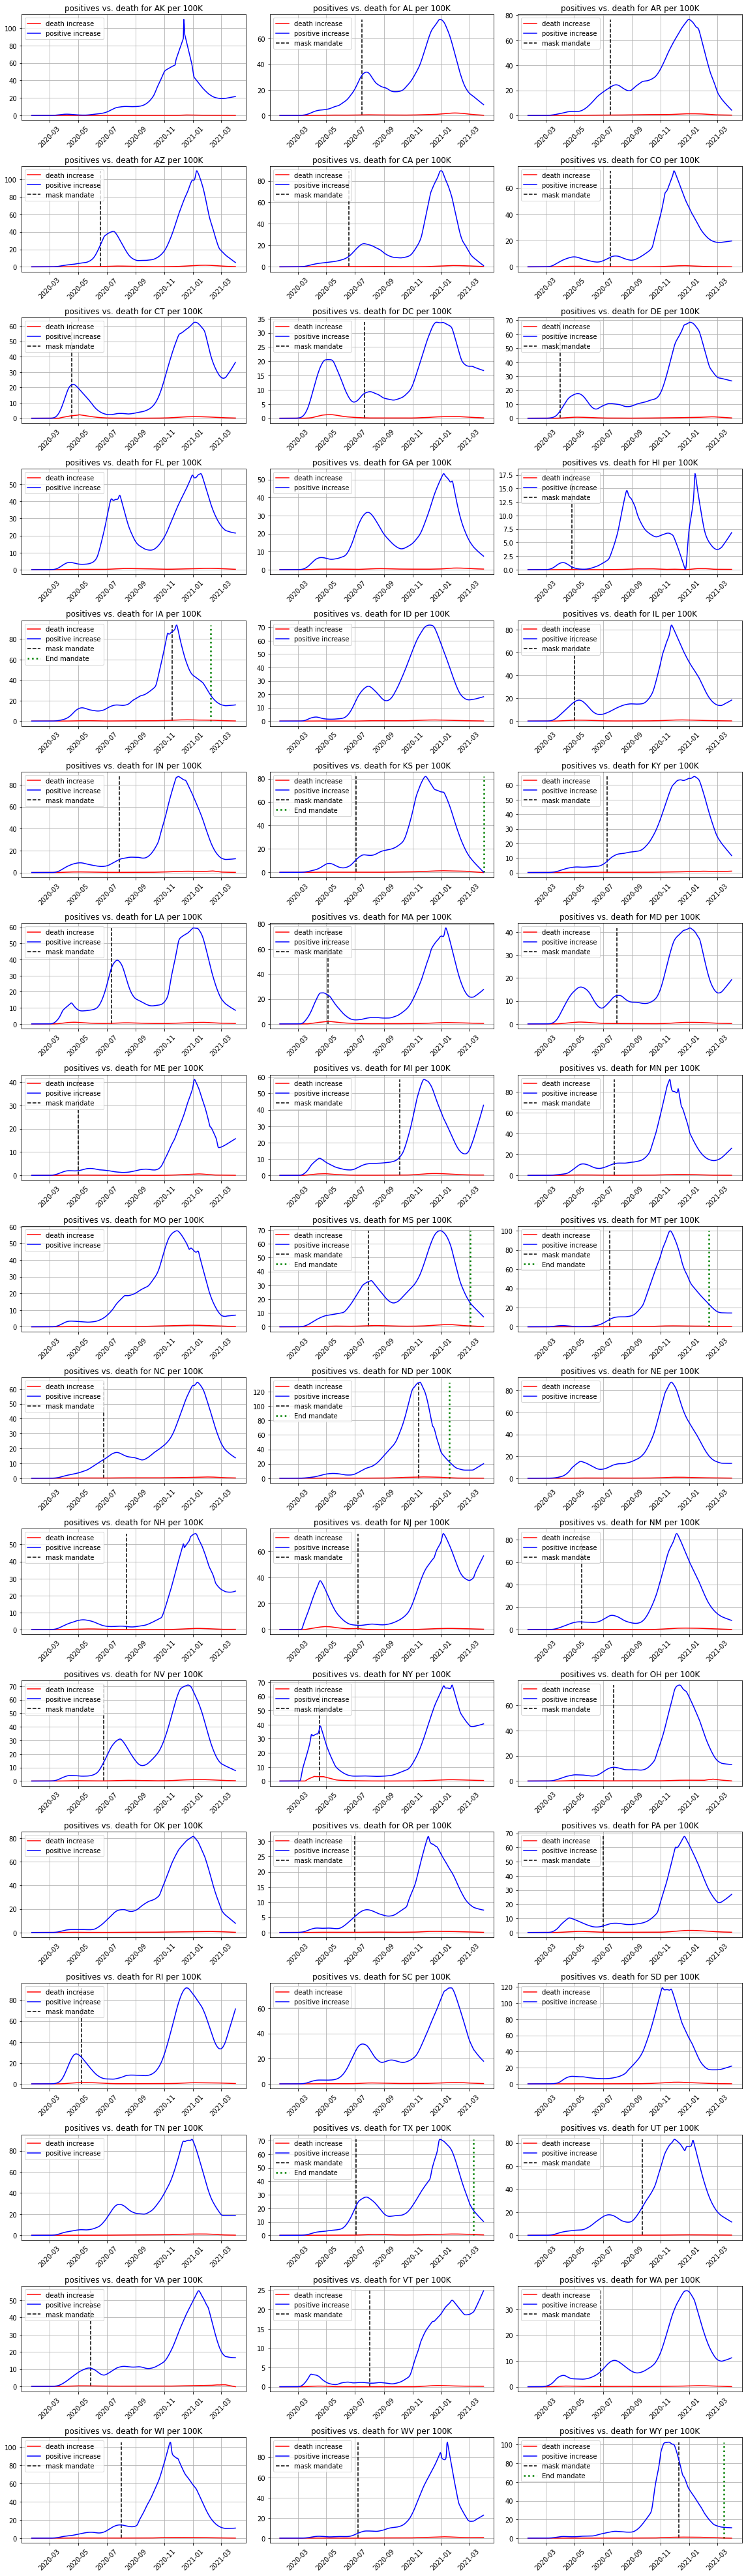

In [44]:
plot_perCap_compare()

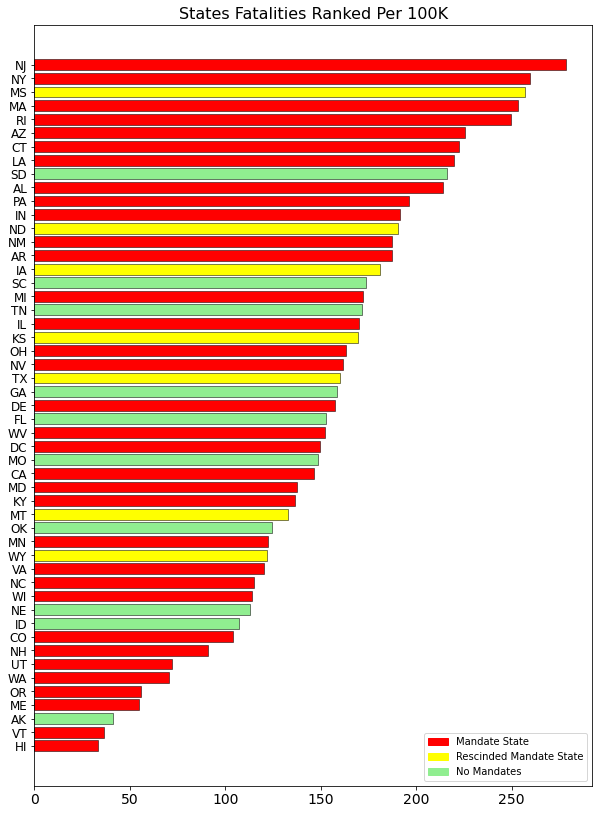

In [45]:
# sort and plot horiz
# states = ['CA','NY','MI','TX','NJ','AZ','NY', 'SD', 'NM', 'FL', 'GA', 'MI', 'OH', 'TN', 'KS', 'OK',\
#          'IL', 'CO', 'UT']
fatalities,x = [],[]

plt.figure(figsize=(10,14))
plt.title("States Fatalities Ranked Per 100K",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# for s in states:
for state in dfStatesPop:
    s = dfStatesPop.at[0,state]
    d = dfD[state].sum()*100000/s 
    fatalities.append(d)
    x.append(state)
    
dfH = pd.DataFrame ({'fatalities': fatalities, 'state': x})
# print(dfH)
# Sort the table
dfH = dfH.sort_values(by=['fatalities'])
bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] in MandStateDates:
        bar_color = 'red'
        lab = "Mandate"
    if bar[i][1] in RescindMandStates:
        bar_color = 'yellow'
        lab = "Rescinded Mandate"
    if bar[i][1] in NoMandStates:
        bar_color = 'lightgreen'
        lab = "No Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
Mand = mpatches.Patch(color='red', label='Mandate State')
RescindMand = mpatches.Patch(color='yellow', label='Rescinded Mandate State')
NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
plt.legend(handles=[Mand, RescindMand, NoMand])
plt.show()

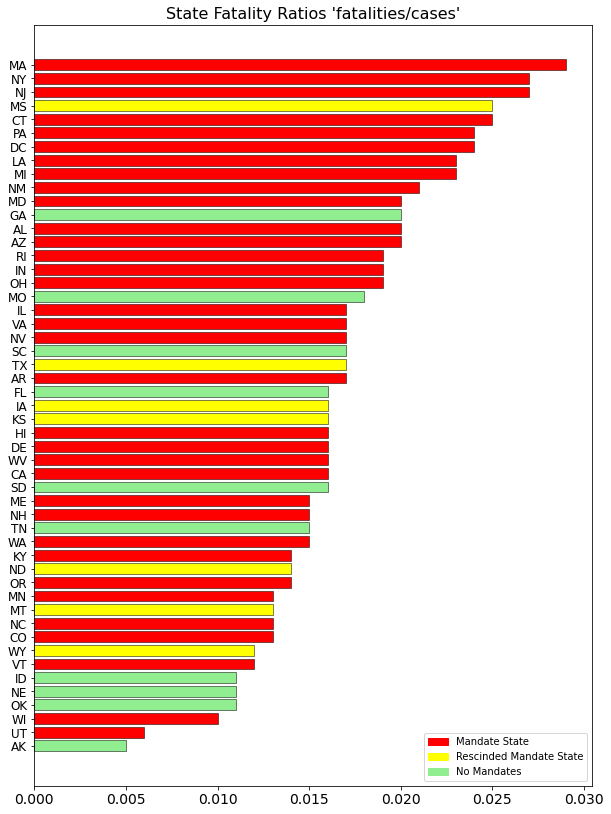

In [46]:
# sort and plot horiz
# states = ['CA','NY','MI','TX','NJ','AZ','NY', 'SD', 'NM', 'FL', 'GA', 'MI', 'OH', 'TN', 'KS', 'OK',\
#          'IL', 'CO', 'UT']
fr,x = [],[]

plt.figure(figsize=(10,14))
plt.title("State Fatality Ratios 'fatalities/cases'",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# for s in states:
for s in AllStates:
    d = float(dfD[s].sum())
    p = float(dfP[s].sum())
    fr.append(round(d/p,3))
    x.append(s)
    
dfH = pd.DataFrame ({'ratio': fr, 'state': x})
# Sort the table
dfH = dfH.sort_values(by=['ratio'])
bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] in MandStateDates:
        bar_color = 'red'
        lab = "Mandate"
    if bar[i][1] in RescindMandStates:
        bar_color = 'yellow'
        lab = "Rescinded Mandate"
    if bar[i][1] in NoMandStates:
        bar_color = 'lightgreen'
        lab = "No Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
Mand = mpatches.Patch(color='red', label='Mandate State')
RescindMand = mpatches.Patch(color='yellow', label='Rescinded Mandate State')
NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
plt.legend(handles=[Mand, RescindMand, NoMand])
plt.show()

In [47]:
dfD["Mandate_States"] = dfD.loc[:,MandStates].sum(axis=1)
dfD["NoMandate_States"] = dfD.loc[:,NoMandStates].sum(axis=1)
dfP["Mandate_States"] = dfP.loc[:,MandStates].sum(axis=1)
dfP["NoMandate_States"] = dfP.loc[:,NoMandStates].sum(axis=1)
pprint(NoMandStates)

['SD', 'OK', 'ID', 'AK', 'GA', 'MO', 'NE', 'SC', 'TN', 'FL']


In [48]:
dfSumP = dfP[['Mandate_States', 'NoMandate_States']].copy()
dfSumD = dfD[['Mandate_States', 'NoMandate_States']].copy()
dfSumP

State,Mandate_States,NoMandate_States
2020-01-23,0.0,0.0
2020-01-24,1.0,0.0
2020-01-25,0.0,0.0
2020-01-26,3.0,0.0
2020-01-27,1.0,0.0
...,...,...
2021-03-28,51589.0,8272.0
2021-03-29,46203.0,8082.0
2021-03-30,43387.0,9354.0
2021-03-31,55866.0,11351.0


In [49]:
dfpop = dfStatesPop.copy()
dfpop["Mandate_States"] = dfpop.loc[:,MandStates].sum(axis=1)
dfpop["NoMandate_States"] = dfpop.loc[:,NoMandStates].sum(axis=1)

In [50]:
Man = dfpop.iloc[0]['Mandate_States']
NoMan = dfpop.iloc[0]['NoMandate_States']
print("Population of States with Mandates = ", Man)
print("Population of States without Mandates = ", NoMan)
print("Total US population = ", Man + NoMan)

Population of States with Mandates =  270754259
Population of States without Mandates =  60589228
Total US population =  331343487


In [51]:
dfSumP['Mandate_States'] = (100000 * dfSumP['Mandate_States']/Man).astype(float) 
dfSumP['NoMandate_States'] = (100000 * dfSumP['NoMandate_States']/NoMan).astype(float)
dfSumD['Mandate_States'] = (100000 * dfSumD['Mandate_States']/Man).astype(float) 
dfSumD['NoMandate_States'] = (100000 * dfSumD['NoMandate_States']/NoMan).astype(float)
timefmt = "%Y-%m-%d" 
# df['Date_Time'] = pd.to_datetime(df['Date_Time'], format = timefmt, errors='coerce')
# dfSum.index = pd.to_datetime(dfSum['Date'], format = timefmt, errors='coerce' )
dfSumP.tail(10)

State,Mandate_States,NoMandate_States
2021-03-23,14.934945,19.992003
2021-03-24,32.169392,19.567835
2021-03-25,18.439968,17.836504
2021-03-26,22.353111,16.580505
2021-03-27,17.627793,18.285429
2021-03-28,19.053809,13.652592
2021-03-29,17.064552,13.339005
2021-03-30,16.024494,15.438388
2021-03-31,20.633470,18.734353
2021-04-01,35.538130,24.555520


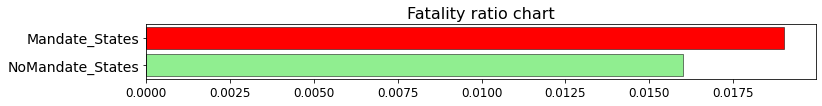

In [52]:
# sort and plot horiz
states = ['Mandate_States', 'NoMandate_States']

fr,x = [],[]
for s in states:
    d = float(dfSumD[s].sum())
    p = float(dfSumP[s].sum())
    fr.append(round(d/p,3))
    x.append(s)
    
dfH = pd.DataFrame ({'ratio': fr, 'state': x})
# Sort the table
dfH = dfH.sort_values(by=['ratio'])

plt.figure(figsize=(12,1))
plt.title("Fatality ratio chart",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
# plt.barh(y=dfH.state, width=dfH.ratio, color='red', edgecolor='k',linewidth=.5);

bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] == 'NoMandate_States':
        bar_color = 'lightgreen'
        lab = "No Mandate"
    else:
        bar_color = 'red'
        lab = "Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
# Mand = mpatches.Patch(color='red', label='Mandate State')
# NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
# plt.legend(handles=[Mand, NoMand]) 

plt.show()